<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

US = pd.read_csv('../data/USArrests.csv')

US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


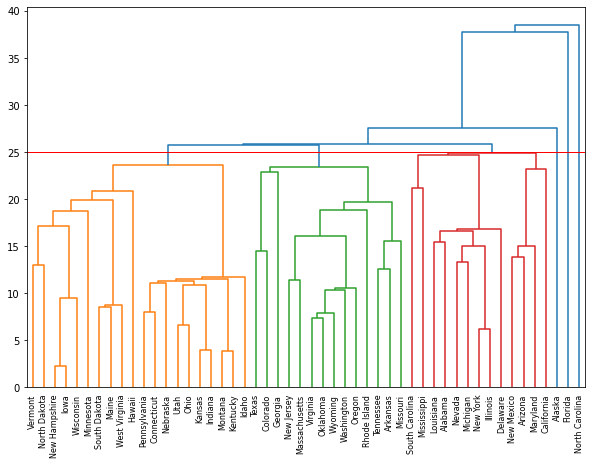

In [3]:
# 최단연결법
single = linkage(US.iloc[:, 1::], metric ='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=25,   #군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


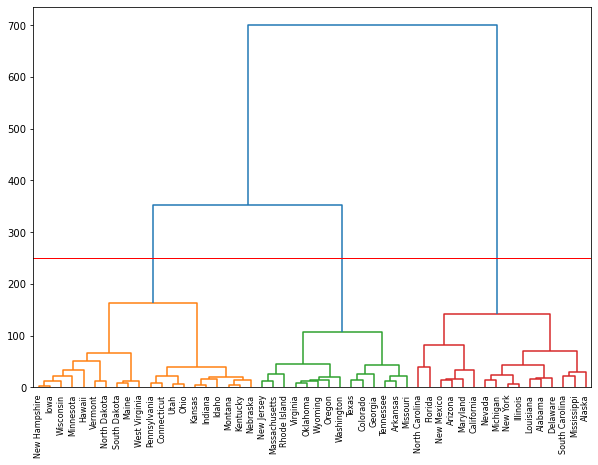

In [6]:
# 와드연결법
ward = linkage(US.iloc[:, 1::], metric ='euclidean', method='ward')
# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


In [7]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments


array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [8]:
US['cluster'] = assignments
US.groupby('cluster').mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [9]:
# 필요한 모듈
import pandas as pd 
from sklearn.cluster import KMeans
# 데이터 로드
iris = pd.read_csv('../data/iris.csv')
X = iris.drop('target',axis=1)
X


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))


513.3038433517568
560.3999242466402
529.1207190840455
494.0943819140986
474.51742958716295
448.8714494416451
436.61302488142496
414.5303174051382


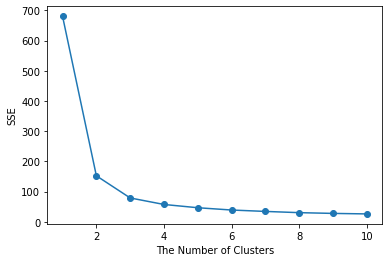

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.95701115711987, 34.32652991452991, 30.227724598930493, 27.766706937799047, 26.07225182334007]


In [13]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(X)

In [14]:
#최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters =3, random_state=1)
km.fit(X)
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

iris.groupby(['cluster']).mean()



,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


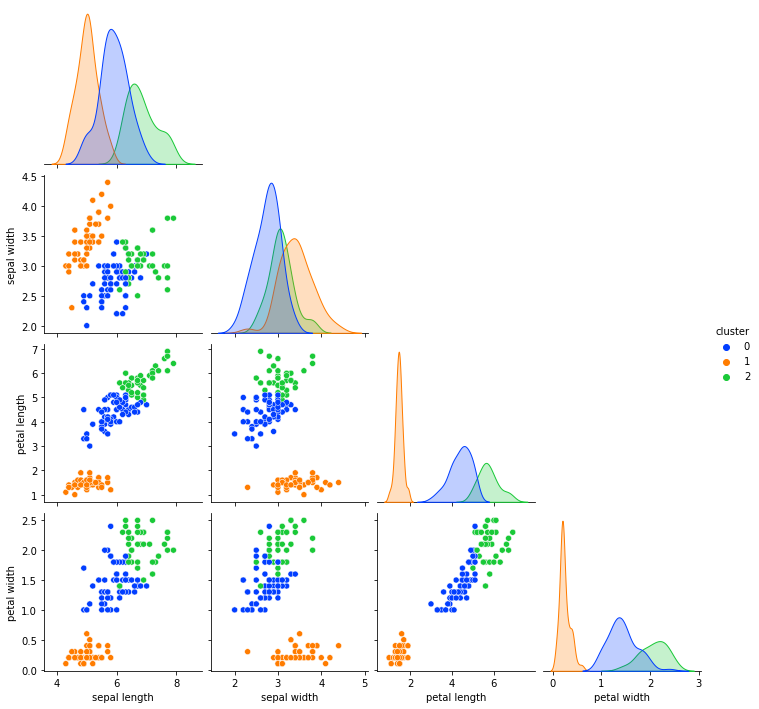

In [17]:
# k-means 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris,
             diag_kind='kde',
             hue="cluster", 
             corner =True,  
             palette='bright')
plt.show()
